In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Algerian_forest_fires_dataset_CLEANED.csv')
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [3]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [4]:
df.drop(['day','month','year'],inplace=True,axis=1)

In [5]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [6]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [7]:
## Encoding of Classes
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [8]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [9]:
## Independent and dependent features

X = df.drop('FWI',axis=1)  ## the independent featues will be all the features except the FWI
y = df['FWI']

In [10]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [11]:
y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [12]:
## Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [13]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

In [14]:
## Feature selection based on correlation

correlation = X_train.corr()

<Axes: >

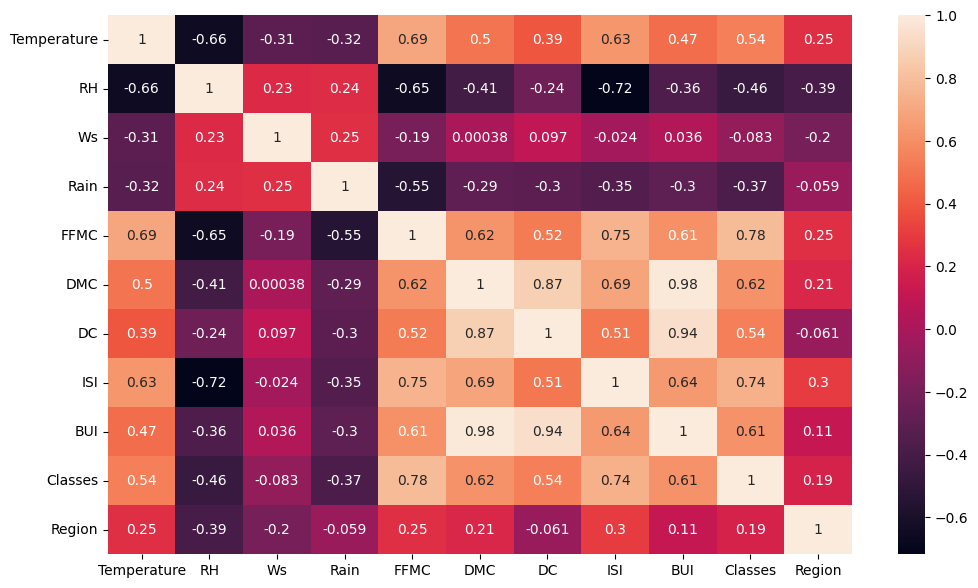

In [15]:
## Checking for multicollinearity (means independent features should not be very correlated with each other)
plt.figure(figsize=(12,7))
sns.heatmap(correlation,annot=True)

In [16]:
## function for multicollinearity

def multicollinearity(dataset,threshold):
    col_corr = set() ## set because we only want unique features to come here
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i): ## only goes will i-1 so doesnt go till the self-correlation
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [17]:
## threshold usually set
corr_features = multicollinearity(X_train,0.85) ## so BUI

In [18]:
## drop the features that are highlt correlated
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape ## was 182,11 and 61,11 before so 2 features got dropped

((182, 9), (61, 9))

## Feature Scaling or Standardization

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]], shape=(182, 9))

## Box Plots to understand the effect of Standard Scaler

We can see that after scaling the units become near same, before scaling the values of different features vary alot

Text(0.5, 1.0, 'X_train after scaling')

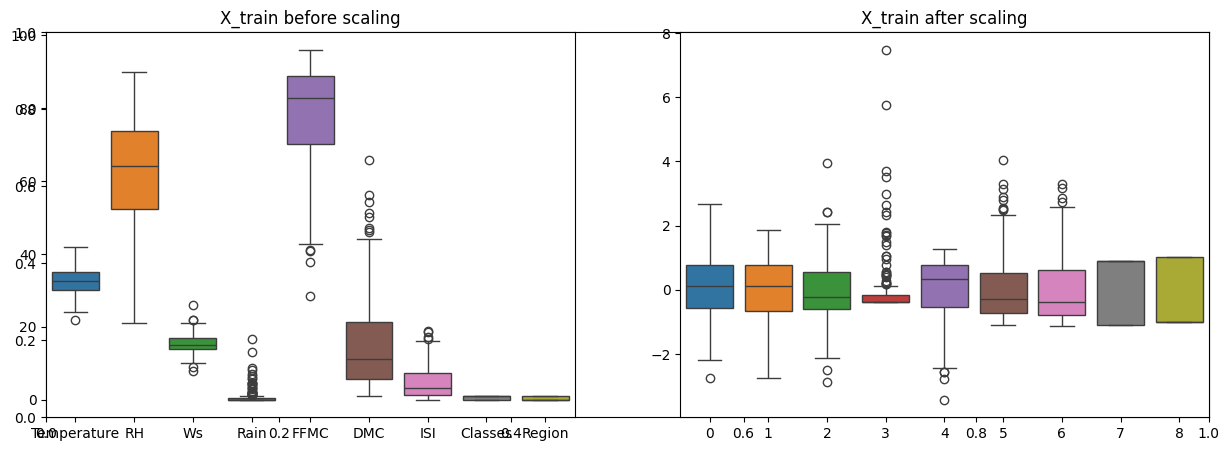

In [21]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title("X_train before scaling")
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title("X_train after scaling")

## Linear Regression

Mean Absolute Error =  0.5468236465249978
Mean Squared Error =  0.674276687379158
Root Mean Squared Error =  0.8211435242265253
R2 Score =  0.9847657384266951


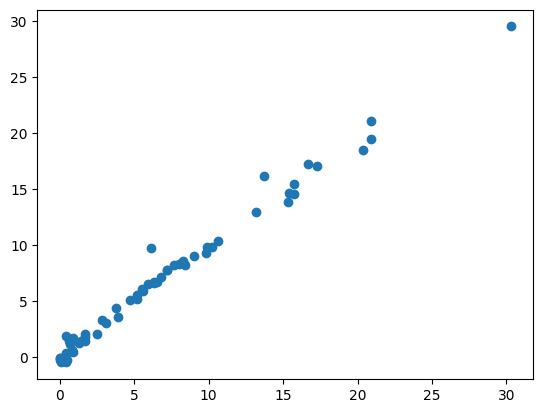

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
lin_regression = LinearRegression()
lin_regression.fit(X_train_scaled,y_train)
y_pred_lin = lin_regression.predict(X_test_scaled)
mae_lin = mean_absolute_error(y_test,y_pred_lin)
mse_lin = mean_squared_error(y_test,y_pred_lin)
rmse_lin = np.sqrt(mse_lin)
score_lin = r2_score(y_test,y_pred_lin)
print('Mean Absolute Error = ',mae_lin)
print('Mean Squared Error = ',mse_lin)
print('Root Mean Squared Error = ',rmse_lin)
print('R2 Score = ',score_lin)
plt.scatter(y_test,y_pred_lin) ## if this is kind of linear then the model is good

## Lasso Regression

Mean Absolute Error =  1.133175994914409
Mean Squared Error =  2.2483458918974772
Root Mean Squared Error =  1.4994485292591664
R2 Score =  0.9492020263112388


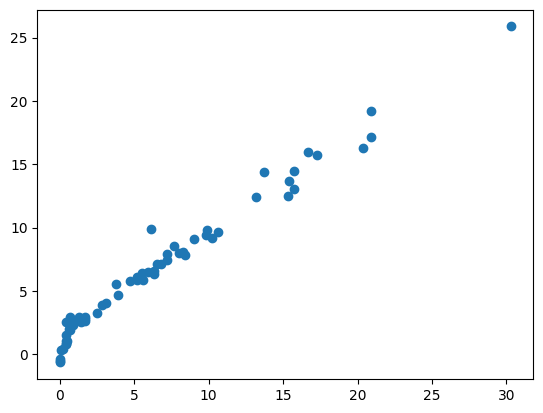

In [23]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
lasso_regression = Lasso()
lasso_regression.fit(X_train_scaled,y_train)
y_pred_lasso = lasso_regression.predict(X_test_scaled)
mae_lasso = mean_absolute_error(y_test,y_pred_lasso)
mse_lasso = mean_squared_error(y_test,y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
score_lasso = r2_score(y_test,y_pred_lasso) ##if its less doesnt necessarily mean model is not performing as well, it may be due to overfitting
print('Mean Absolute Error = ',mae_lasso)
print('Mean Squared Error = ',mse_lasso)
print('Root Mean Squared Error = ',rmse_lasso)
print('R2 Score = ',score_lasso)
plt.scatter(y_test,y_pred_lasso)

## Ridge Regression

Mean Absolute Error =  0.5642305340105715
Mean Squared Error =  0.6949198918152096
Root Mean Squared Error =  0.8336185529456561
R2 Score =  0.9842993364555512


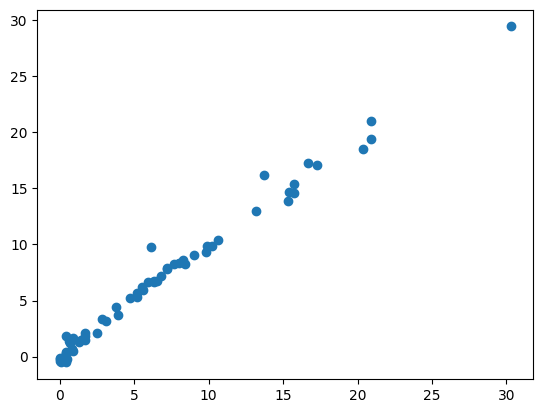

In [24]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
ridge_regression = Ridge()
ridge_regression.fit(X_train_scaled,y_train)
y_pred_ridge = ridge_regression.predict(X_test_scaled)
mae_ridge = mean_absolute_error(y_test,y_pred_ridge)
mse_ridge = mean_squared_error(y_test,y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
score_ridge = r2_score(y_test,y_pred_ridge) ##if its less doesnt necessarily mean model is not performing as well, it may be due to overfitting
print('Mean Absolute Error = ',mae_ridge)
print('Mean Squared Error = ',mse_ridge)
print('Root Mean Squared Error = ',rmse_ridge)
print('R2 Score = ',score_ridge)
plt.scatter(y_test,y_pred_ridge) 

## Elastic Net Regression

Mean Absolute Error =  1.8822353634896005
Mean Squared Error =  5.5172511010252245
Root Mean Squared Error =  2.3488829474933874
R2 Score =  0.8753460589519703


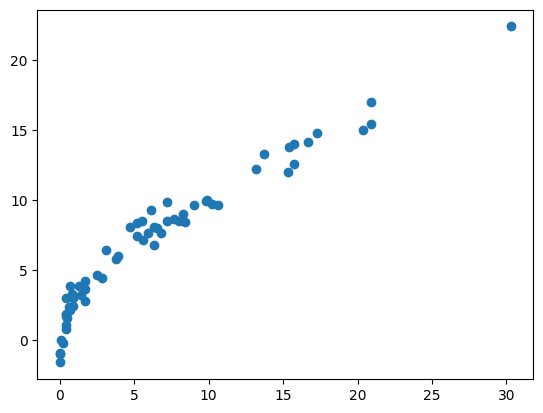

In [25]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
elastic_regression = ElasticNet()
elastic_regression.fit(X_train_scaled,y_train)
y_pred_elastic = elastic_regression.predict(X_test_scaled)
mae_elastic = mean_absolute_error(y_test,y_pred_elastic)
mse_elastic = mean_squared_error(y_test,y_pred_elastic)
rmse_elastic = np.sqrt(mse_elastic)
score_elastic = r2_score(y_test,y_pred_elastic)
print('Mean Absolute Error = ',mae_elastic)
print('Mean Squared Error = ',mse_elastic)
print('Root Mean Squared Error = ',rmse_elastic)
print('R2 Score = ',score_elastic)
plt.scatter(y_test,y_pred_elastic) 

## Hyper Parameter Tuning

### Lasso CV

In [26]:
from sklearn.linear_model import LassoCV
lassocv_reg = LassoCV(cv=5)
lassocv_reg.fit(X_train_scaled,y_train)
print("Best average alpha : ",lassocv_reg.alpha_)

Best average alpha :  0.05725391318234408


In [27]:
lassocv_reg.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [28]:
lassocv_reg.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

Mean Absolute Error =  0.619970115826343
Mean Squared Error =  0.792499555474362
Root Mean Squared Error =  0.8902244410677355
R2 Score =  0.9820946715928275


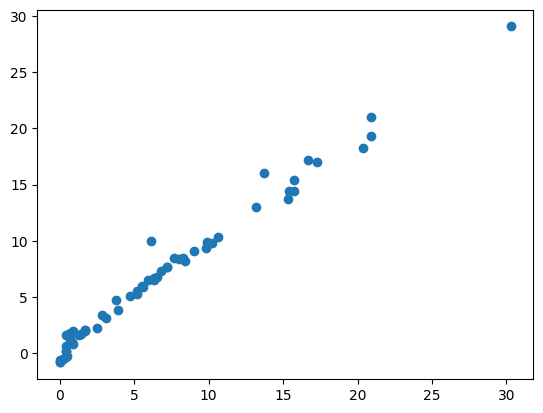

In [29]:
y_pred_lassocv = lassocv_reg.predict(X_test_scaled)
mae_lassocv = mean_absolute_error(y_test,y_pred_lassocv)
mse_lassocv = mean_squared_error(y_test,y_pred_lassocv)
rmse_lassocv = np.sqrt(mse_lassocv)
score_lassocv = r2_score(y_test,y_pred_lassocv)
print('Mean Absolute Error = ',mae_lassocv)
print('Mean Squared Error = ',mse_lassocv)
print('Root Mean Squared Error = ',rmse_lassocv)
print('R2 Score = ',score_lassocv)
plt.scatter(y_test,y_pred_lassocv)

### Ridge CV

Mean Absolute Error =  0.5642305340105715
Mean Squared Error =  0.6949198918152096
Root Mean Squared Error =  0.8336185529456561
R2 Score =  0.9842993364555512


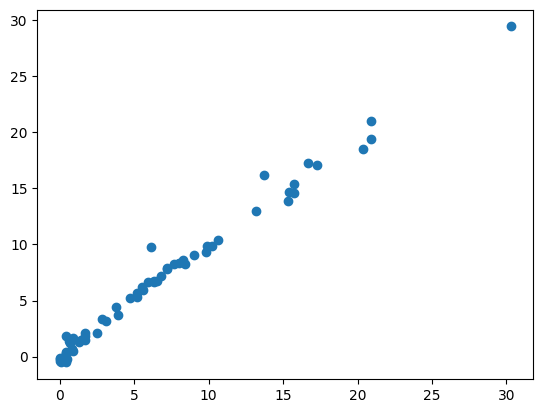

In [30]:
from sklearn.linear_model import RidgeCV
ridgecv_reg = RidgeCV(cv=5) ## it takes leave one out as cv method by default if we dont provide value of cv
ridgecv_reg.fit(X_train_scaled,y_train)
y_pred_ridgecv = ridgecv_reg.predict(X_test_scaled)
mae_ridgecv = mean_absolute_error(y_test,y_pred_ridgecv)
mse_ridgecv = mean_squared_error(y_test,y_pred_ridgecv)
rmse_ridgecv = np.sqrt(mse_ridgecv)
score_ridgecv = r2_score(y_test,y_pred_ridgecv)
print('Mean Absolute Error = ',mae_ridgecv)
print('Mean Squared Error = ',mse_ridgecv)
print('Root Mean Squared Error = ',rmse_ridgecv)
print('R2 Score = ',score_ridgecv)
plt.scatter(y_test,y_pred_ridgecv)


In [31]:
print(ridgecv_reg.alpha_)
print(ridgecv_reg.alphas)

1.0
(0.1, 1.0, 10.0)


Mean Absolute Error =  0.6575946731430898
Mean Squared Error =  0.8222830416276258
Root Mean Squared Error =  0.906798236449336
R2 Score =  0.9814217587854941


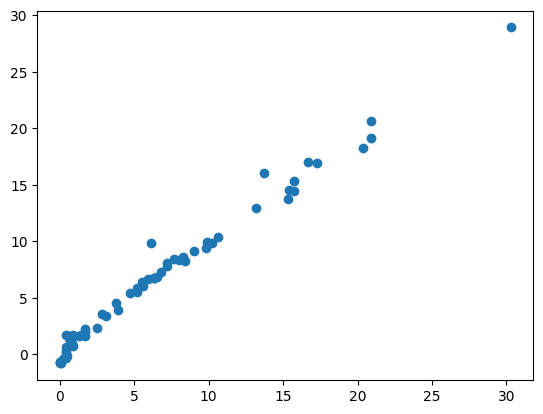

In [32]:
from sklearn.linear_model import ElasticNetCV
elasticcv_reg = ElasticNetCV(cv=5) ## it takes leave one out as cv method by default if we dont provide value of cv
elasticcv_reg.fit(X_train_scaled,y_train)
y_pred_elasticcv = elasticcv_reg.predict(X_test_scaled)
mae_elasticcv = mean_absolute_error(y_test,y_pred_elasticcv)
mse_elasticcv = mean_squared_error(y_test,y_pred_elasticcv)
rmse_elasticcv = np.sqrt(mse_elasticcv)
score_elasticcv = r2_score(y_test,y_pred_elasticcv)
print('Mean Absolute Error = ',mae_elasticcv)
print('Mean Squared Error = ',mse_elasticcv)
print('Root Mean Squared Error = ',rmse_elasticcv)
print('R2 Score = ',score_elasticcv)
plt.scatter(y_test,y_pred_elasticcv)

In [33]:
elasticcv_reg.alpha_

np.float64(0.04311146156383891)

In [34]:
elasticcv_reg.alphas_

array([14.11706004, 13.16561744, 12.27829889, 11.45078264, 10.67903821,
        9.95930678,  9.28808283,  8.66209714,  8.07830078,  7.53385034,
        7.02609405,  6.55255882,  6.11093829,  5.6990815 ,  5.31498248,
        4.95677045,  4.62270071,  4.31114616,  4.02058933,  3.74961507,
        3.49690356,  3.26122397,  3.04142839,  2.83644629,  2.64527931,
        2.46699633,  2.30072904,  2.1456676 ,  2.00105679,  1.86619226,
        1.74041714,  1.62311885,  1.51372607,  1.411706  ,  1.31656174,
        1.22782989,  1.14507826,  1.06790382,  0.99593068,  0.92880828,
        0.86620971,  0.80783008,  0.75338503,  0.7026094 ,  0.65525588,
        0.61109383,  0.56990815,  0.53149825,  0.49567705,  0.46227007,
        0.43111462,  0.40205893,  0.37496151,  0.34969036,  0.3261224 ,
        0.30414284,  0.28364463,  0.26452793,  0.24669963,  0.2300729 ,
        0.21456676,  0.20010568,  0.18661923,  0.17404171,  0.16231189,
        0.15137261,  0.1411706 ,  0.13165617,  0.12278299,  0.11

## Pickel the machine larning model and also the preprocessing model

In [35]:
scaler

,copy,True
,with_mean,True
,with_std,True


In [36]:
ridge_regression

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [ ]:
import pickle
pickle.dump(scaler,open('std_scaler.pkl','wb'))
pickle.dump(scaler,open('ridge_reg.pkl','wb'))